# 3for2 IAQ Data from BMS

Clayton Miller
Feb 22, 2017

Extract data and analyze data according to Jovan's instructions:

```
This will be the airside dataset. This will show the operation of air and water components of 3for2 for periods of time when we used kits to measure performance in the space. These plots should have time on the x-axis and then respective quantities on the y-axis. If you have some other idea to show it please go ahead with it. Idea from my perspective here is to show dinamic response of the system and difference between various spaces.

I will use names in the horsebrokedown dashboard.

For the period December 29th and January 7th and February 10th to 16th in the Airside System I would like to show an operation of the ventilation supply and CO2 levels in the exhaust air by comparing following readings:

CO2 sensors: B10_Area3for2_A_Ahu1_DOAS_CO2Ex
                       B10_Area3for2_A_Ahu3_DOAS_CO2Ex
                       B10_Area3for2_A_Ahu4_DOAS_CO2Ex

Air system supply flow rates: B10_Area3for2_A_Ahu1_DOAS_FanSuEh_FISu
                                               B10_Area3for2_A_Ahu3_DOAS_FanSuEh_FISu
                                               B10_Area3for2_A_Ahu4_DOAS_FanSuEh_FISu

DOAS air system modulation: B10_Area3for2_A_Ahu1_DOAS_FanSuEh_MdltSu
                                                 B10_Area3for2_A_Ahu3_DOAS_FanSuEh_MdltSu
                                                 B10_Area3for2_A_Ahu4_DOAS_FanSuEh_MdltSu

For the period December 29th and January 7th and February 10th to 16th in the Waterside System

Valve positions Chilled Beams: B10_Area3for2_R_FO3_CcgVlvPos_1
                                                  B10_Area3for2_R_HRM_CcgVlvPos_1
                                                  B10_Area3for2_R_O_CcgVlvPos_1
                                                  B10_Area3for2_R_P_CcgVlvPos_1

Supply water temperatures PCB: B10_Area3for2_Mtr_CGrpPCB_FO3_TFI
                                                     B10_Area3for2_Mtr_CGrpPCB_HRM_TFI
                                                     B10_Area3for2_Mtr_CGrpPCB_Om1_TFI
                                                     B10_Area3for2_Mtr_CGrpPCB_Pm1_TFI

Water flowrate PCB: B10_Area3for2_Mtr_CGrpPCB_FO3_FL
B10_Area3for2_Mtr_CGrpPCB_HRM_FL
B10_Area3for2_Mtr_CGrpPCB_Om1_FL
B10_Area3for2_Mtr_CGrpPCB_Om2_FL
B10_Area3for2_Mtr_CGrpPCB_Om3_FL
B10_Area3for2_Mtr_CGrpPCB_Om4_FL
B10_Area3for2_Mtr_CGrpPCB_Om5_FL
B10_Area3for2_Mtr_CGrpPCB_Pm1_FL
B10_Area3for2_Mtr_CGrpPCB_Pm2_FL
```

In [15]:
import pandas as pd
from influxdb import DataFrameClient
import pytz
import seaborn as sns
import json
import datetime
import matplotlib.pyplot as plt

from pylab import *
from __future__ import division

In [16]:
%matplotlib inline

## First let's grab the BMS data from the already downloaded data frames

In [17]:
import matplotlib.pyplot as plt
from matplotlib import dates

In [18]:
sns.set(style="ticks")

In [19]:
#filelist = ["CO2_Dec_Feb.csv","Airflows_Dec_Feb.csv","CoilValve_Dec_Feb.csv","WaterSupplyTemp_Dec_Feb.csv","WaterFlowRate_Dec_Feb.csv"]
#,"AirflowRate_Dec_Feb.csv","FanModulation_Dec_Feb.csv"]

## Airside system

In [20]:
import dateutil


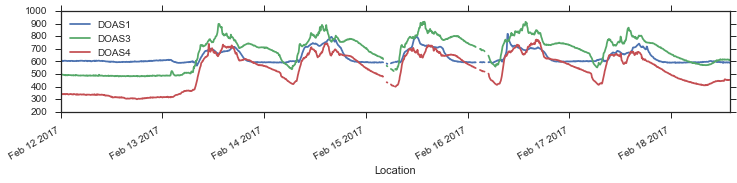

In [21]:
date_parser = lambda x: dateutil.parser.parse(x, ignoretz=True)
co2 = pd.read_csv("./extracted_data/new_space/bulk_data/CO2_Dec_Feb.csv", index_col='Location', skiprows=[1,2], parse_dates=True, date_parser=date_parser)
co2 = co2[co2.columns[co2.columns.str.contains("DOAS")]].truncate(before='2017-02-12', after='2017-02-19')
co2 = co2[['DOAS1','DOAS3','DOAS4']]
co2.plot(figsize=(12,2))
# sns.despine(offset=10, trim=True);

In [22]:
co2.head()

,DOAS1,DOAS3,DOAS4
Location,,,
2017-02-12 00:00:00,601.500000,490.000000,340.200012
2017-02-12 00:05:00,603.933350,493.333333,344.199992
2017-02-12 00:10:00,603.100006,494.000000,341.799988
2017-02-12 00:15:00,602.666667,494.466675,339.000020
2017-02-12 00:20:00,603.600006,495.000000,338.600037


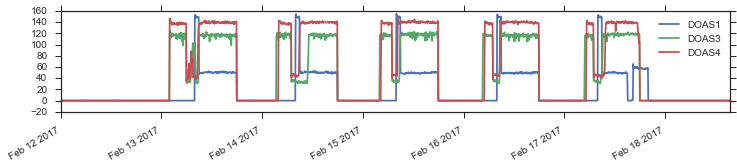

In [23]:
airflowrate = pd.read_csv("./extracted_data/new_space/bulk_data/AirflowRate.csv", index_col='Unnamed: 0', parse_dates=True, date_parser=date_parser)
airflowrate = airflowrate.truncate(before='2017-02-12', after='2017-02-19')
airflowrate = airflowrate[['B10_Area3for2_A_Ahu1_DOAS_FanSuEh_FlSu','B10_Area3for2_A_Ahu3_DOAS_FanSuEh_FlSu','B10_Area3for2_A_Ahu4_DOAS_FanSuEh_FlSu']]
airflowrate.columns = ['DOAS1','DOAS3','DOAS4']
airflowrate.plot(figsize=(12,2));

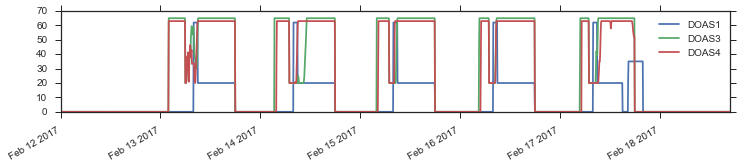

In [24]:
airmod = pd.read_csv("./extracted_data/new_space/bulk_data/FanModulation_Dec_Feb.csv", index_col='Unnamed: 0', parse_dates=True, date_parser=date_parser)
airmod = airmod.truncate(before='2017-02-12', after='2017-02-19')
airmod = airmod[['B10_Area3for2_A_Ahu1_DOAS_FanSuEh_MdltSu','B10_Area3for2_A_Ahu3_DOAS_FanSuEh_MdltSu','B10_Area3for2_A_Ahu4_DOAS_FanSuEh_MdltSu']]
airmod.columns = ['DOAS1','DOAS3','DOAS4']
airmod.plot(figsize=(12,2));

In [25]:
airmod.index.name = "Time Frame"

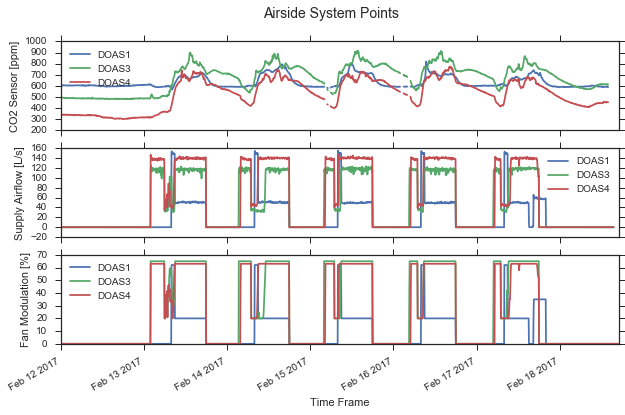

In [30]:
f, axes = plt.subplots(3, 1, sharex=True, figsize=(10,6))
    
f.suptitle("Airside System Points", fontsize=14)


co2.plot(ax=axes[0])
axes[0].set_ylabel("CO2 Sensor [ppm]")
co2.to_csv("./extracted_data/new_space/targeted_data/AirSystemCO2.csv")

airflowrate.plot(ax=axes[1])
axes[1].set_ylabel("Supply Airflow [L/s]")
airflowrate.to_csv("./extracted_data/new_space/targeted_data/AirflowRate.csv")

airmod.plot(ax=axes[2])
axes[2].set_ylabel("Fan Modulation [%]")
airmod.to_csv("./extracted_data/new_space/targeted_data/AirMod.csv")

plt.savefig("./figures/Airside_points.pdf", bbox_inches='tight')

# sns.despine(offset=10, trim=True)

## Waterside system

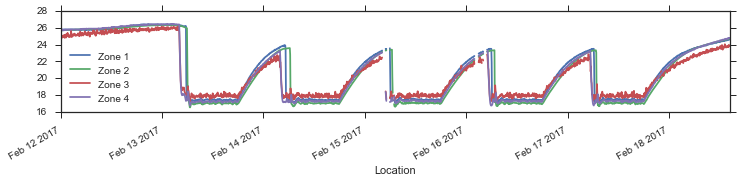

In [33]:
watertemp = pd.read_csv("./extracted_data/new_space/bulk_data/WaterSupplyTemp_Dec_Feb.csv", index_col='Location', skiprows=[1,2], parse_dates=True, date_parser=date_parser)
watertemp = watertemp[['OpenOffice','HRMeeting','FinanceOffice3','Pantry']].truncate(before='2017-02-12', after='2017-02-19')
watertemp.columns = ["Zone 3","Zone 2","Zone 1","Zone 4"]
watertemp = watertemp.sort_index(axis=1)
watertemp.plot(figsize=(12,2))

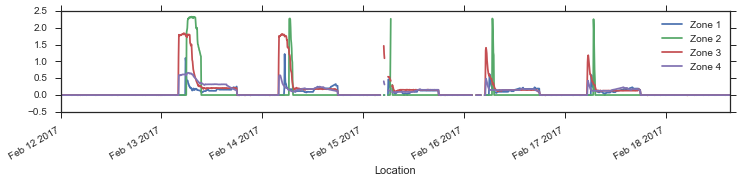

In [34]:
waterflow = pd.read_csv("./extracted_data/new_space/bulk_data/WaterFlowRate_Dec_Feb.csv", index_col='Location', skiprows=[1,2], parse_dates=True, date_parser=date_parser)
waterflow = waterflow[['OpenOffice','HRMeeting','FinanceOffice3','Pantry']].truncate(before='2017-02-12', after='2017-02-19')
waterflow.columns = ["Zone 3","Zone 2","Zone 1","Zone 4"]
waterflow = waterflow.sort_index(axis=1)
waterflow.plot(figsize=(12,2))

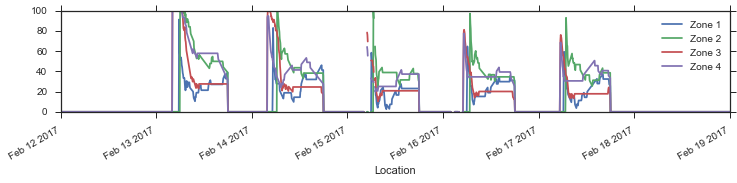

In [35]:
valvepos = pd.read_csv("./extracted_data/new_space/bulk_data/PCBValve_Dec_Feb.csv", index_col='Location', skiprows=[1,2], parse_dates=True, date_parser=date_parser)
valvepos = valvepos[['OpenOffice','HRMeeting','FinanceOffice3','Pantry']].truncate(before='2017-02-12', after='2017-02-19')
valvepos.columns = ["Zone 3","Zone 2","Zone 1","Zone 4"]
valvepos = valvepos.sort_index(axis=1)
valvepos.plot(figsize=(12,2))

In [36]:
valvepos.index.name='Time Frame'

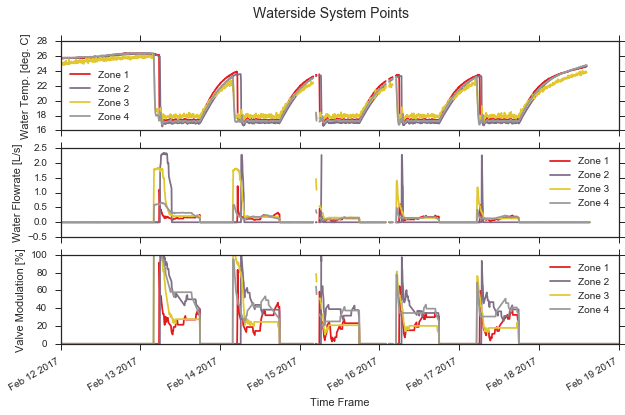

In [38]:
f, axes = plt.subplots(3, 1, sharex=True, figsize=(10,6))
    
f.suptitle("Waterside System Points", fontsize=14)

watertemp.plot(ax=axes[0], colormap='Set1')
axes[0].set_ylabel("Water Temp. [deg. C]")
watertemp.to_csv("./extracted_data/new_space/targeted_data/WaterSystemTemp.csv")

waterflow.plot(ax=axes[1], colormap='Set1')
axes[1].set_ylabel("Water Flowrate [L/s]")
waterflow.to_csv("./extracted_data/new_space/targeted_data/WaterSystemFlow.csv")

valvepos.plot(ax=axes[2], colormap='Set1')
axes[2].set_ylabel("Valve Modulation [%]")
valvepos.to_csv("./extracted_data/new_space/targeted_data/WaterValvePosition.csv")

plt.savefig("./figures/Waterside_points.pdf", bbox_inches='tight')